# NYC BLOCKS AND MTA

In [18]:
import os
import pandas as pd
import numpy as np
from random import randint, uniform
from datetime import datetime
from urllib import urlretrieve
from zipfile import ZipFile
import fiona 
import geopandas as gpd
from geopandas import GeoDataFrame 
import shapefile

from shapely.geometry import Point
from shapely.geometry import Polygon

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (10.0, 10.0)


In [1]:
# BRING IN BLOCK DATA
blocshapes = gpd.GeoDataFrame.from_file('mappy.dbf')
blocshapes.head()

,admin_fire,assemdist,atomic_num,atomicid,borough,censusbl_1,censusbl_2,censusbl_3,censusbloc,censustr_1,...,sb_1_page,sb_1_volum,sb_2_page,sb_2_volum,sb_3_page,sb_3_volum,schooldist,shape_area,shape_leng,water_flag
0,E 151,62,None,5024401430,5,None,1020,None,4023,024401,...,533,05,None,None,None,None,31,244110.620576,2424.560416,2
1,E 151,62,None,5024401439,5,None,2004,None,4030,024401,...,533,05,None,None,None,None,31,177042.348067,1722.931212,2
2,E 151,62,None,5024402223,5,B,1005,None,2002,024402,...,530,05,529,05,None,None,31,33790.843893,770.085650,2
3,E 151,62,None,5024401441,5,None,2005,None,4031,024401,...,533,05,None,None,None,None,31,171623.335762,1697.908522,2
4,E 151,62,None,5024401440,5,None,1018,None,4015,024401,...,532,05,None,None,None,None,31,78855.828376,1243.106869,2


In [1]:
# BRING IN MTA DATA
import pandas as pd
import csv
mta2 = pd.read_csv("income_by_subway_stops.csv")
mta2.head()

,subway line,lat,long,county_name,position,income2011,income2000,stop_name,county,tract,tract_lookup
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,40.701961,-74.013397,Manhattan,1.0,124048.0,105456.0,South Ferry,61.0,900.0,900.0
2,1,40.708107,-74.013445,Manhattan,2.0,114412.0,81609.0,Rector St.,61.0,1300.0,1300.0
3,1,40.715576,-74.009031,Manhattan,3.0,205192.0,128384.0,Chambers St.,61.0,2100.0,2100.0
4,1,40.719918,-74.006620,Manhattan,4.0,164656.0,113332.0,Franklin St.,61.0,3300.0,3300.0


In [2]:
# CLEAN COLUMNS
mta2 = mta2.drop(['county_name', 'position','income2011','income2000','tract','tract_lookup','county'],1)

In [3]:
# CLEAN ROWS
mta2 = mta2.drop(0,0)

In [4]:
mta2.head()

,subway line,lat,long,stop_name
1,1,40.701961,-74.013397,South Ferry
2,1,40.708107,-74.013445,Rector St.
3,1,40.715576,-74.009031,Chambers St.
4,1,40.719918,-74.006620,Franklin St.
5,1,40.722497,-74.005994,Canal St.


In [5]:
# CLEAN DATAFRAME
mta2 = mta2.rename(columns = {'subway line':'subway_line'})
mta2 = mta2.dropna()

In [7]:
mta2.shape

(701, 4)

In [10]:
# CONVERT STATION DATAFRAME TO GEODATAFRAME
crs = {'init' :'epsg:4326'}
geometry = [Point(xy) for xy in zip(mta2.long, mta2.lat)]
mta2_gdf = GeoDataFrame(mta2, geometry=geometry)
mta2_gdf.head()

,subway_line,lat,long,stop_name,geometry
1,1,40.701961,-74.013397,South Ferry,POINT (-74.013397 40.701961)
2,1,40.708107,-74.013445,Rector St.,POINT (-74.01344499999999 40.708107)
3,1,40.715576,-74.009031,Chambers St.,POINT (-74.00903100000001 40.715576)
4,1,40.719918,-74.006620,Franklin St.,POINT (-74.00662 40.719918)
5,1,40.722497,-74.005994,Canal St.,POINT (-74.005994 40.722497)


(40.69, 40.81)

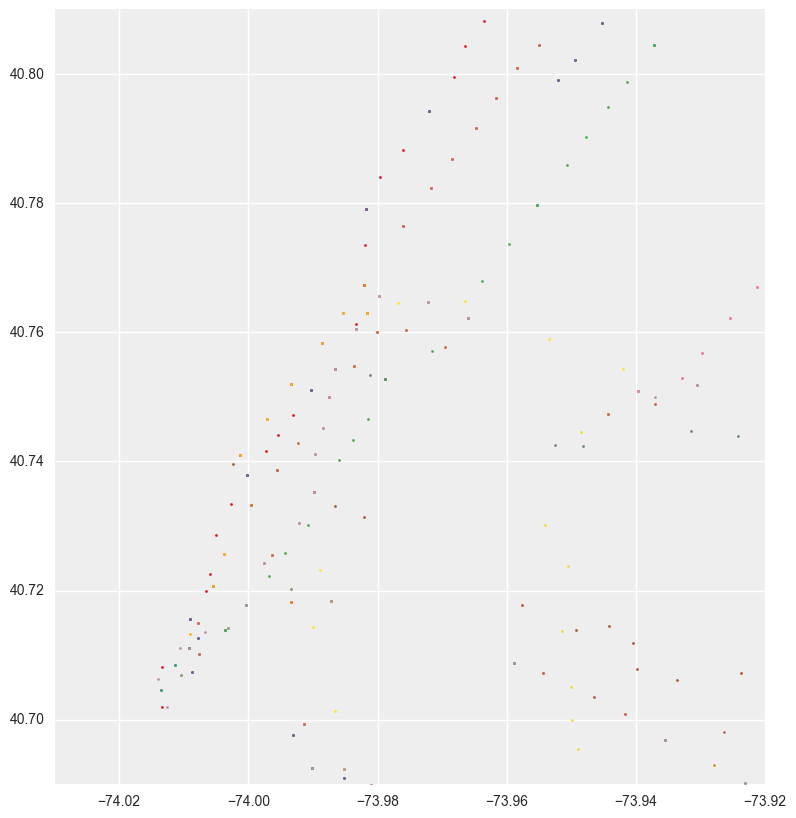

In [13]:
mta2_gdf.plot('subway_line')
plt.xlim(-74.03, -73.92)
plt.ylim(40.69, 40.81)

(40.65, 40.81)

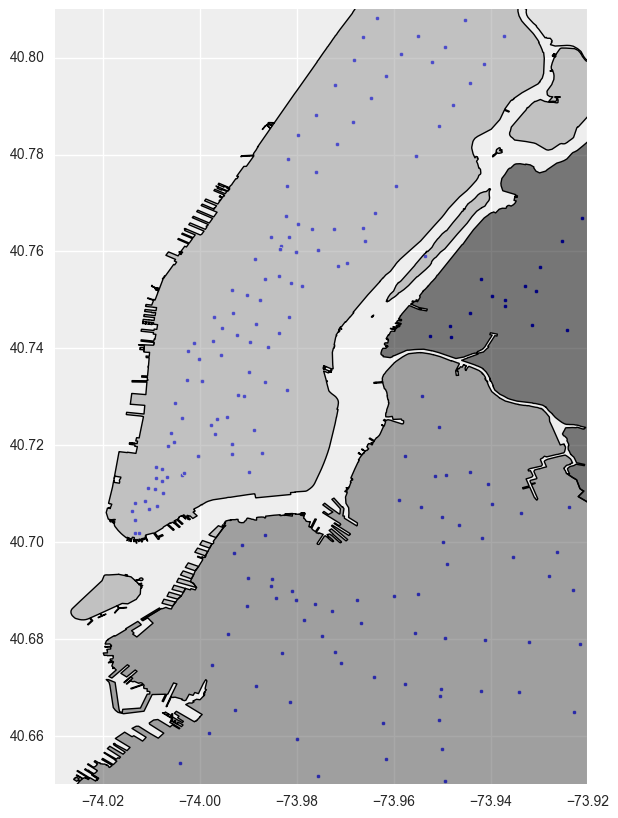

In [25]:
zips.plot()
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.scatter(x=mta2['long'], y=mta2['lat'], c='b', s=10)
plt.xlim(-74.03, -73.92)
plt.ylim(40.65, 40.81)

In [37]:
# FUNCTION TO GET DISTANCE TO THE 3 CLOSEST MTA STATIONS TO BLOCK
def closest_mtas(x):
    distances=[]
    for i,j in enumerate(mta2_gdf.geometry):    
        distance = x.distance(j)
        distances.append(distance) 
    distances = sorted(distances)        
    return distances[0:4]

In [38]:
blocshapes['closest_mtastations'] = blocshapes.geometry.apply(closest_mtas) 

In [39]:
blocshapes.head()

,admin_fire,assemdist,atomic_num,atomicid,borough,censusbl_1,censusbl_2,censusbl_3,censusbloc,censustr_1,...,sb_1_volum,sb_2_page,sb_2_volum,sb_3_page,sb_3_volum,schooldist,shape_area,shape_leng,water_flag,closest_mtastations
0,E 151,62,None,5024401430,5,None,1020,None,4023,024401,...,05,None,None,None,None,31,244110.620576,2424.560416,2,"[0.242428389554, 0.247227281305, 0.25252207981..."
1,E 151,62,None,5024401439,5,None,2004,None,4030,024401,...,05,None,None,None,None,31,177042.348067,1722.931212,2,"[0.236859586008, 0.241711596108, 0.24705439816..."
2,E 151,62,None,5024402223,5,B,1005,None,2002,024402,...,05,529,05,None,None,31,33790.843893,770.085650,2,"[0.229135059429, 0.234059704395, 0.23946790353..."
3,E 151,62,None,5024401441,5,None,2005,None,4031,024401,...,05,None,None,None,None,31,171623.335762,1697.908522,2,"[0.235713559318, 0.240572355528, 0.24592139642..."
4,E 151,62,None,5024401440,5,None,1018,None,4015,024401,...,05,None,None,None,None,31,78855.828376,1243.106869,2,"[0.247370128834, 0.252118772915, 0.25736810009..."


In [40]:
# ORGANIZE / SEPERATE STATIONS
blocshapes['mta1_distance'] = blocshapes.closest_mtastations.apply(lambda x: x[0])
blocshapes['mta2_distance'] = blocshapes.closest_mtastations.apply(lambda x: x[1])
blocshapes['mta3_distance'] = blocshapes.closest_mtastations.apply(lambda x: x[2])

In [42]:
blocshapes.head()

,admin_fire,assemdist,atomic_num,atomicid,borough,censusbl_1,censusbl_2,censusbl_3,censusbloc,censustr_1,...,sb_3_page,sb_3_volum,schooldist,shape_area,shape_leng,water_flag,closest_mtastations,mta1_distance,mta2_distance,mta3_distance
0,E 151,62,None,5024401430,5,None,1020,None,4023,024401,...,None,None,31,244110.620576,2424.560416,2,"[0.242428389554, 0.247227281305, 0.25252207981...",0.242428,0.247227,0.252522
1,E 151,62,None,5024401439,5,None,2004,None,4030,024401,...,None,None,31,177042.348067,1722.931212,2,"[0.236859586008, 0.241711596108, 0.24705439816...",0.236860,0.241712,0.247054
2,E 151,62,None,5024402223,5,B,1005,None,2002,024402,...,None,None,31,33790.843893,770.085650,2,"[0.229135059429, 0.234059704395, 0.23946790353...",0.229135,0.234060,0.239468
3,E 151,62,None,5024401441,5,None,2005,None,4031,024401,...,None,None,31,171623.335762,1697.908522,2,"[0.235713559318, 0.240572355528, 0.24592139642...",0.235714,0.240572,0.245921
4,E 151,62,None,5024401440,5,None,1018,None,4015,024401,...,None,None,31,78855.828376,1243.106869,2,"[0.247370128834, 0.252118772915, 0.25736810009...",0.247370,0.252119,0.257368


In [43]:
# DROP COLUMNS
blocshapes = blocshapes.drop(['admin_fire', 'assemdist', 'atomic_num', 'borough',
       'censusbl_1', 'censusbl_2', 'censusbl_3', 'censusbloc',
       'censustr_1', 'censustr_2', 'censustrac', 'commdist', 'electdist',
       'geometry', 'hurricane', 'sb_1_page', 'sb_1_volum', 'sb_2_page',
       'sb_2_volum', 'sb_3_page', 'sb_3_volum', 'schooldist',
       'shape_area', 'shape_leng', 'water_flag', 
                             'closest_mtastations' ], 1)

In [44]:
blocshapes.head()

,atomicid,mta1_distance,mta2_distance,mta3_distance
0,5024401430,0.242428,0.247227,0.252522
1,5024401439,0.236860,0.241712,0.247054
2,5024402223,0.229135,0.234060,0.239468
3,5024401441,0.235714,0.240572,0.245921
4,5024401440,0.247370,0.252119,0.257368


In [45]:
blocshapes.shape

(65788, 4)

In [46]:
blocshapes.to_csv("Blocs_mtadistances.csv")

In [14]:
# JOIN BLOCKS AND STATION DATA (INNER JOIN)
blocs_mta_inner = gpd.sjoin(blocshapes, mta2_gdf, how="inner", op='intersects') #used to be left
blocs_mta_inner.head() 

,admin_fire,assemdist,atomic_num,atomicid,borough,censusbl_1,censusbl_2,censusbl_3,censusbloc,censustr_1,...,sb_3_volum,schooldist,shape_area,shape_leng,water_flag,index_right,subway_line,lat,long,stop_name
1641,E 245,46,None,3036001402,3,None,1001,None,2003,036001,...,None,21,114560.458077,1410.439523,2,604,Q,40.576234,-73.967561,Ocean Parkway
2885,E 253,47,None,3029800204,3,None,2003,None,2003,029800,...,None,21,150481.414973,1765.263739,2,359,D,40.597889,-73.986958,25 Ave.
3165,E 245,46,None,3035400133,3,None,1006,None,1008,035400,...,None,21,551517.164145,3116.691608,2,416,F,40.580576,-73.974443,Neptune Ave.
3205,L 166,45,None,3030800120,3,None,1000,None,1001,030800,...,None,21,914201.746256,4291.565078,2,358,D,40.588066,-73.983498,Bay 50 St.
3380,E 265,23,None,4099200324,4,None,2015,None,3007,099200,...,None,27,59246.476648,2061.958701,2,246,A,40.595469,-73.767919,Beach 36 St.


In [15]:
blocs_mta_inner.shape

(701, 31)

In [31]:
# DROP COLUMNS
blocs_mta_inner = blocs_mta_inner.drop(['admin_fire', 'assemdist', 'atomic_num', 'borough',
       'censusbl_1', 'censusbl_2', 'censusbl_3', 'censusbloc',
       'censustr_1', 'censustr_2', 'censustrac', 'commdist', 'electdist',
       'geometry', 'hurricane', 'sb_1_page', 'sb_1_volum', 'sb_2_page',
       'sb_2_volum', 'sb_3_page', 'sb_3_volum', 'schooldist',
       'shape_area', 'shape_leng', 'water_flag', 'subway_line', 'lat', 'long', 'stop_name'], 1)

In [35]:
blocs_mta_inner.head(25)

,atomicid,index_right
1641,3036001402,604
2885,3029800204,359
3165,3035400133,416
3205,3030800120,358
3380,4099200324,246
3617,4097202125,247
4165,3044600101,421
4228,3052000106,614
4252,3152200119,615
4469,3024200207,365


In [33]:
blocs_mta_inner.shape

(701, 2)

In [34]:
blocs_mta_inner.to_csv("BlocsMTA.csv")